# Day 11: Space Police

https://adventofcode.com/2019/day/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AOC2019 import Intcode, readIntcodeProg

In [2]:
prog = readIntcodeProg("input11.txt")

In [3]:
# directions (x,y)
U = np.array([0,+1])
D = np.array([0,-1])
R = np.array([+1,0])
L = np.array([-1,0])

In [4]:
X = [0,0] # starting position
V = U # starting direction
print(U, V)

[0 1] [0 1]


In [5]:
def movement(X,V,turn):
    if turn==0: # turn left 90 degrees
        if   np.array_equal(V,U): X+=L; V=L
        elif np.array_equal(V,D): X+=R; V=R
        elif np.array_equal(V,R): X+=U; V=U
        elif np.array_equal(V,L): X+=D; V=D
    elif turn==1: # turn right 90 degrees
        if   np.array_equal(V,U): X+=R; V=R
        elif np.array_equal(V,D): X+=L; V=L
        elif np.array_equal(V,R): X+=D; V=D
        elif np.array_equal(V,L): X+=U; V=U
    return X, V

In [6]:
X, V = movement(X,V,0)
X, V

(array([-1,  0]), array([-1,  0]))

In [18]:
def robot( prog, init, X, V, shape, debug = False ):

    # matrices for painted paves and robot effective path
    color = np.zeros(shape)
    path = np.zeros(shape)

    # initialize intcode computer
    b = Intcode(prog,"BRAIN")

    # set the color of the first pave
    color[X[1]][X[0]] = init
    
    while(not b.isHalted):

        if debug: print("X =",X,"V =",V)
    
        inp = color[X[1]][X[0]]      
        if debug: print("input =",inp)
    
        # run program with current color as input
        b.runProgram(inp)
        c = b.getLastOutput()
        if debug: print("color =",c)

        if (b.isHalted): # don't paint the last pave if program halts!
            break
        
        # paint current pave with output
        color[X[1]][X[0]] = c
    
        # save path, use it to debug needed matrix dimention 
        # and to count pave painted at least once
        if not path[X[1]][X[0]]:
            path[X[1]][X[0]] = 1

        # run program again 
        b.runProgram(c)
        t = b.getLastOutput()
        if debug: print("turn = ",t)
    
        # move according to output
        X, V = movement(X,V,t)
        
    return path, color

In [19]:
path1, color1 = robot( prog, 0, [1,6], U, (80,450) )

In [20]:
print("Painted at least once =",path1.sum())

Painted at least once = 1709.0


In [21]:
path2, color2 = robot( prog, 1, [1,6], U, (8,45) )

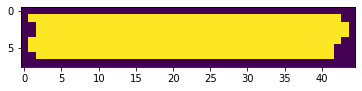

In [22]:
plt.imshow(np.flip(path2,0))

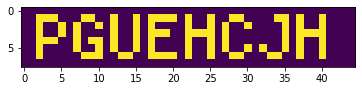

In [23]:
plt.imshow(np.flip(color2,0))